In [9]:
import sys
sys.path.append('../')
sys.path.append('../scripts')
import os
import pandas as pd
from scripts.data_handler import get_data
from transformers import AutoTokenizer,DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import random
from transformers import pipeline, AutoModelForSequenceClassification, DistilBertTokenizer, AdamW, RobertaModel, RobertaTokenizer
from scripts.data_loader import ProductReviewDataset
import seaborn as sns
from scripts.evaluation import Evaluator
from matplotlib import pyplot as plt 
from scripts.models import DistilRobertaForSentimentClassification 
import torch

In [2]:
cache_dir_d_drive = "D:/models"
review_texts, labels = get_data()
review_texts_train, review_texts_test, labels_train, labels_test = train_test_split(review_texts, labels, test_size=0.2, random_state=42)

Evaluate Fine_tuned_distilbert

In [3]:

from scripts.evaluation import Evaluator
tokenizer_distilbert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', cache_dir=cache_dir_d_drive)
model_distilbert = DistilBertForSequenceClassification.from_pretrained('../models/fine_tuned_distilbert', cache_dir=cache_dir_d_drive, num_labels = 5)


train_loader_distilbert, val_loader_distilbert = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer_distilbert)
evaluator = Evaluator(model_distilbert,val_loader_distilbert,num_labels = 5)
evaluator.evaluate_model()
loss = evaluator.loss
mean_difference = evaluator.mean_difference
print(f"for DistilBert Mode : loss = {loss}", f"mean difference = {mean_difference}")

100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

for DistilBert Mode : loss = 0.5320144061531339 mean difference = 0.27


Evaluate Pre_Built Bert Model

In [4]:

model_bert = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment' ,cache_dir=cache_dir_d_drive,  num_labels = 5)
tokenizer_bert = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment' ,cache_dir=cache_dir_d_drive)
train_loader_bert, val_loader_bert = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer_bert)
evaluator_bert = Evaluator(model_bert,val_loader_bert,num_labels = 5)
evaluator_bert.evaluate_model()
loss_bert = evaluator_bert.loss
mean_difference_bert = evaluator_bert.mean_difference
print(f"for Bert Mode : loss = {loss_bert}", f"mean difference = {mean_difference_bert}")


100%|██████████| 7/7 [00:17<00:00,  2.45s/it]

for Bert Mode : loss = 0.9153095058032444 mean difference = 0.47


Evaluate Fine_tuned_roberta Model

In [10]:
base_model = RobertaModel.from_pretrained('distilroberta-base', cache_dir=cache_dir_d_drive, num_labels = 5)
model_roberta = DistilRobertaForSentimentClassification(base_model, num_labels = 5)
model_roberta.load_state_dict(torch.load("../models/fine_tuned_distilroberta_base.pth"))
tokenizer_roberta = RobertaTokenizer.from_pretrained('distilroberta-base', cache_dir=cache_dir_d_drive)
train_loader_roberta, val_loader_roberta = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer_roberta)
evaluator_roberta = Evaluator(model_roberta,val_loader_roberta,num_labels = 5)
evaluator_roberta.evaluate_model()
loss_roberta = evaluator_roberta.loss
mean_difference_roberta = evaluator_roberta.mean_difference
print(f"for DistilRoberta Mode : loss = {loss_roberta}", f"mean difference = {mean_difference_roberta}")

100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

for DistilRoberta Mode : loss = 0.5413067936897278 mean difference = 0.25


Samples With The Worst Predictions For Fine_tuned_distilbert

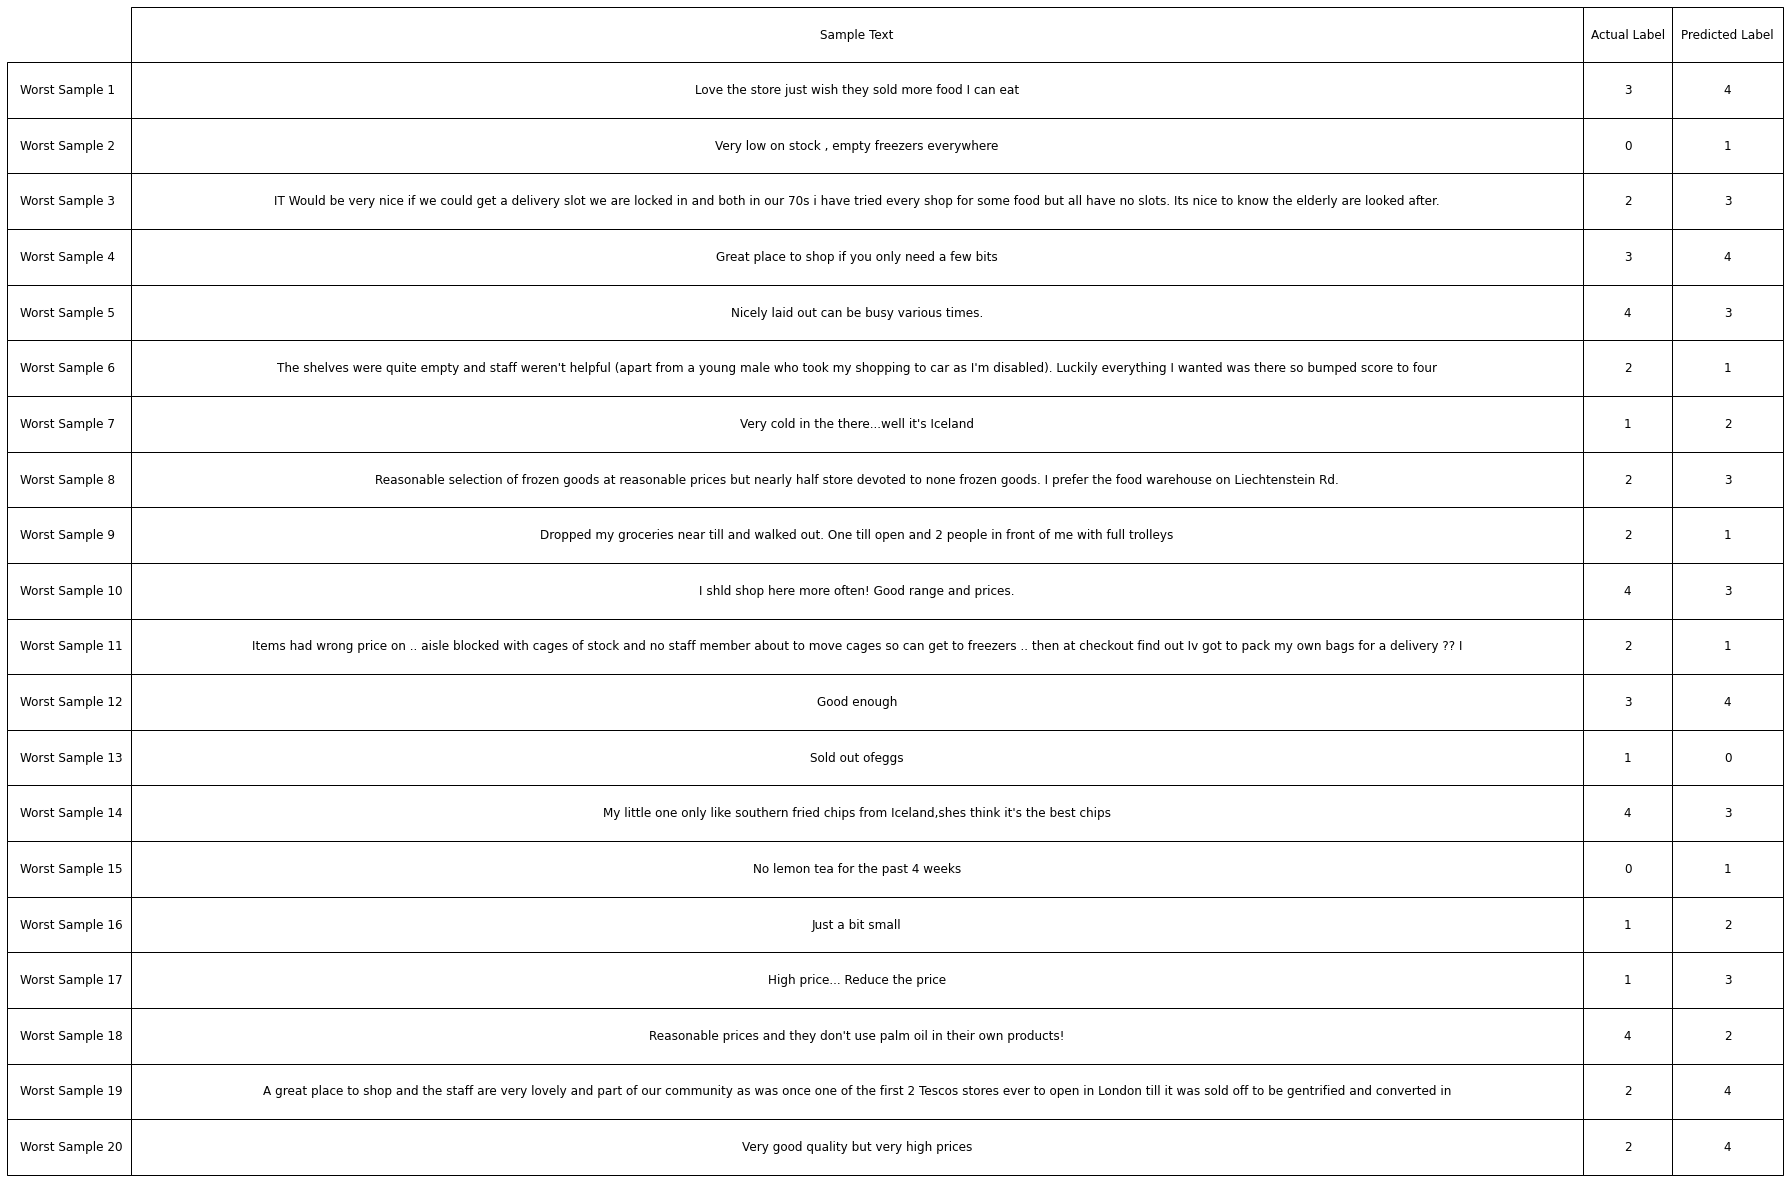

In [5]:

evaluator.display_worst_predictions(20,review_texts_test)

Samples With The Worst Predictions For Distil_roberta 

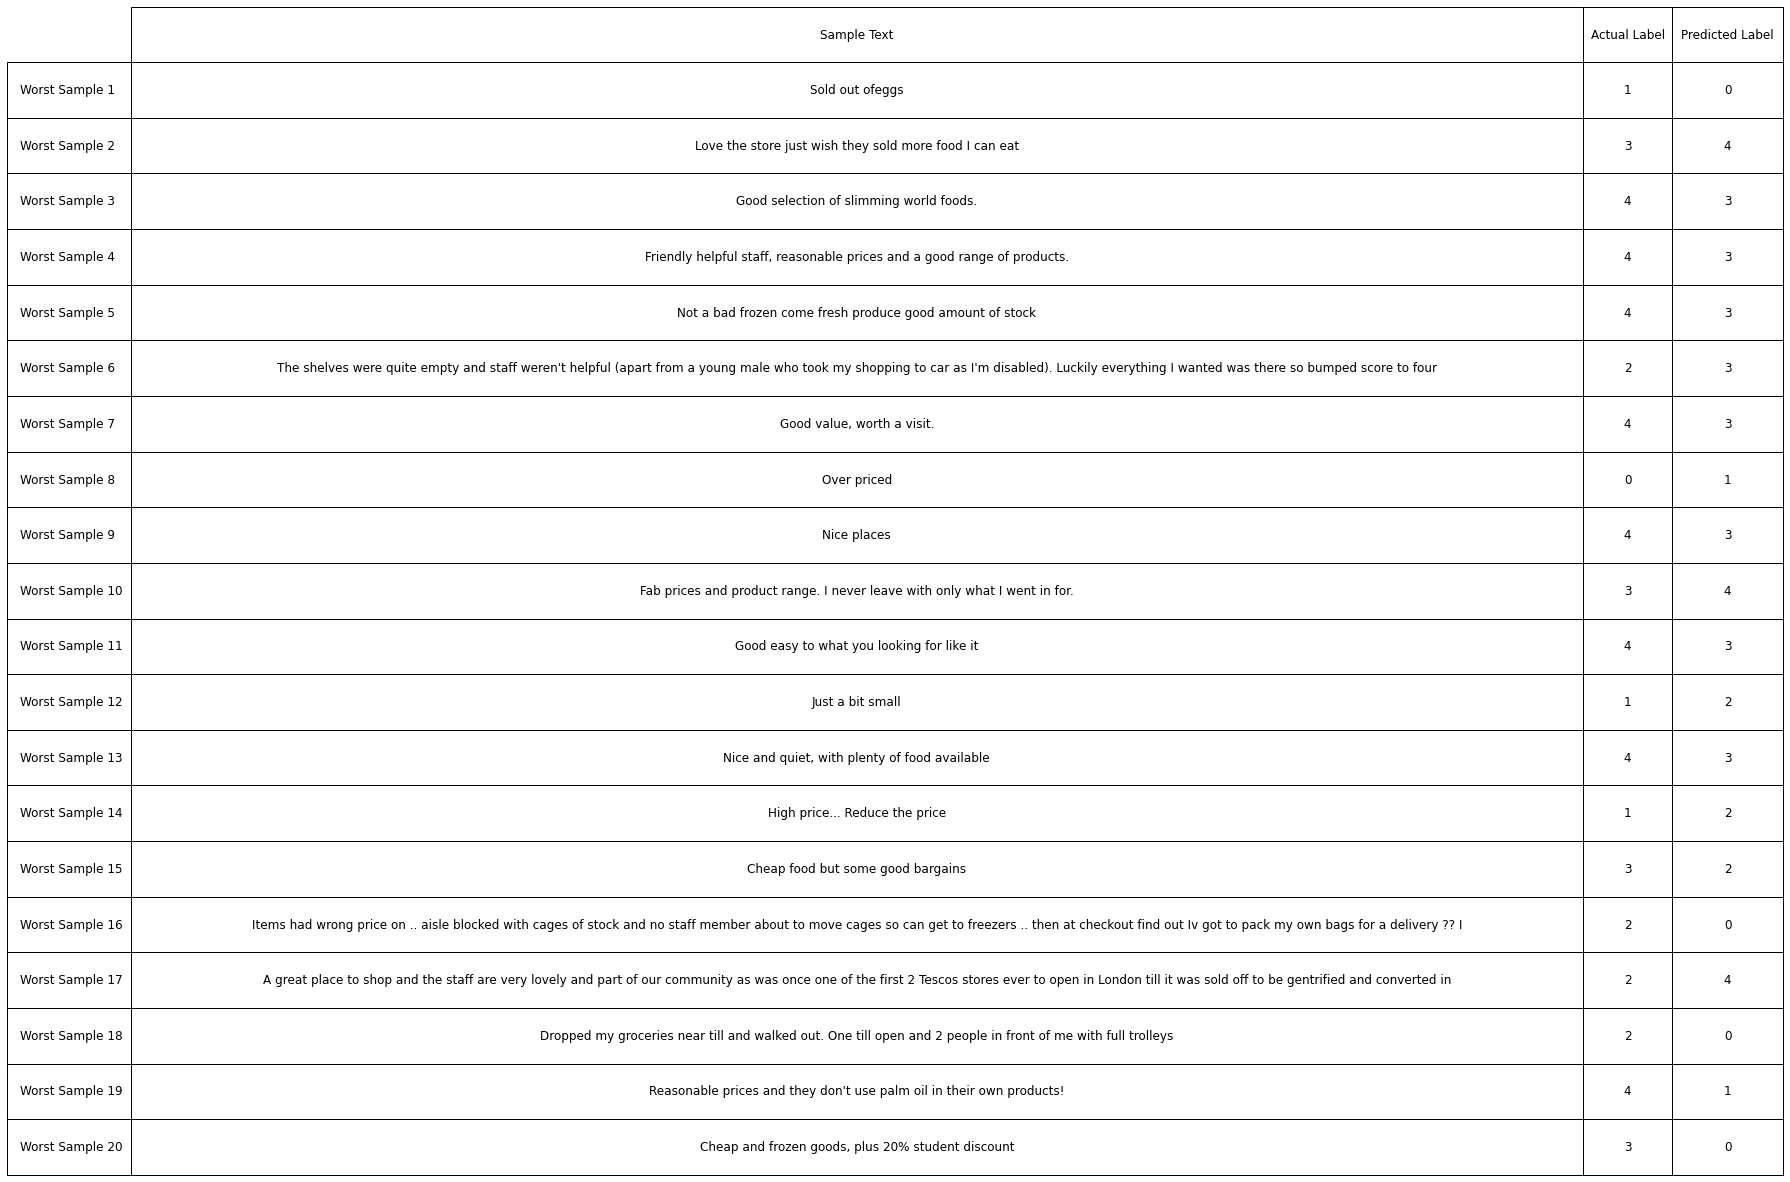

In [6]:

evaluator_roberta.display_worst_predictions(20,review_texts_test)

Comparative Analysis of Fine-Tuned DistilBERT and Pre-trained Multilingual BERT Models on Customer Review Data

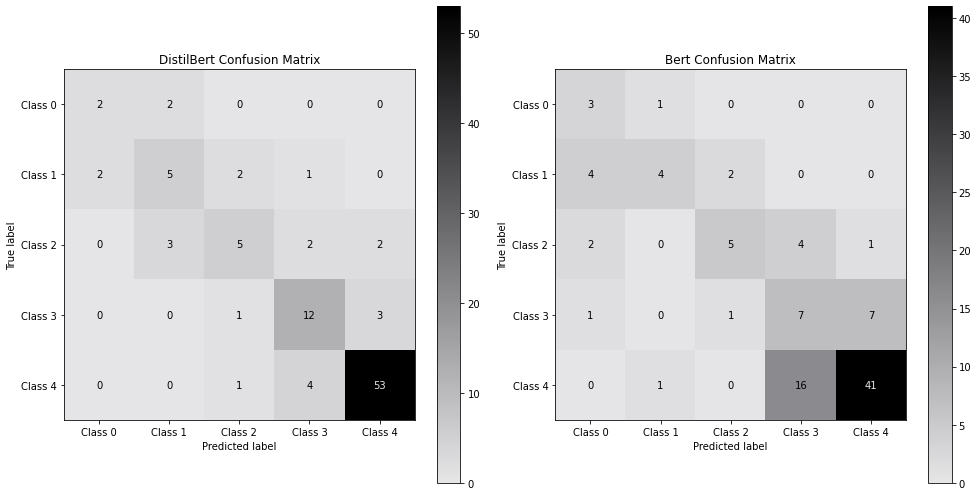

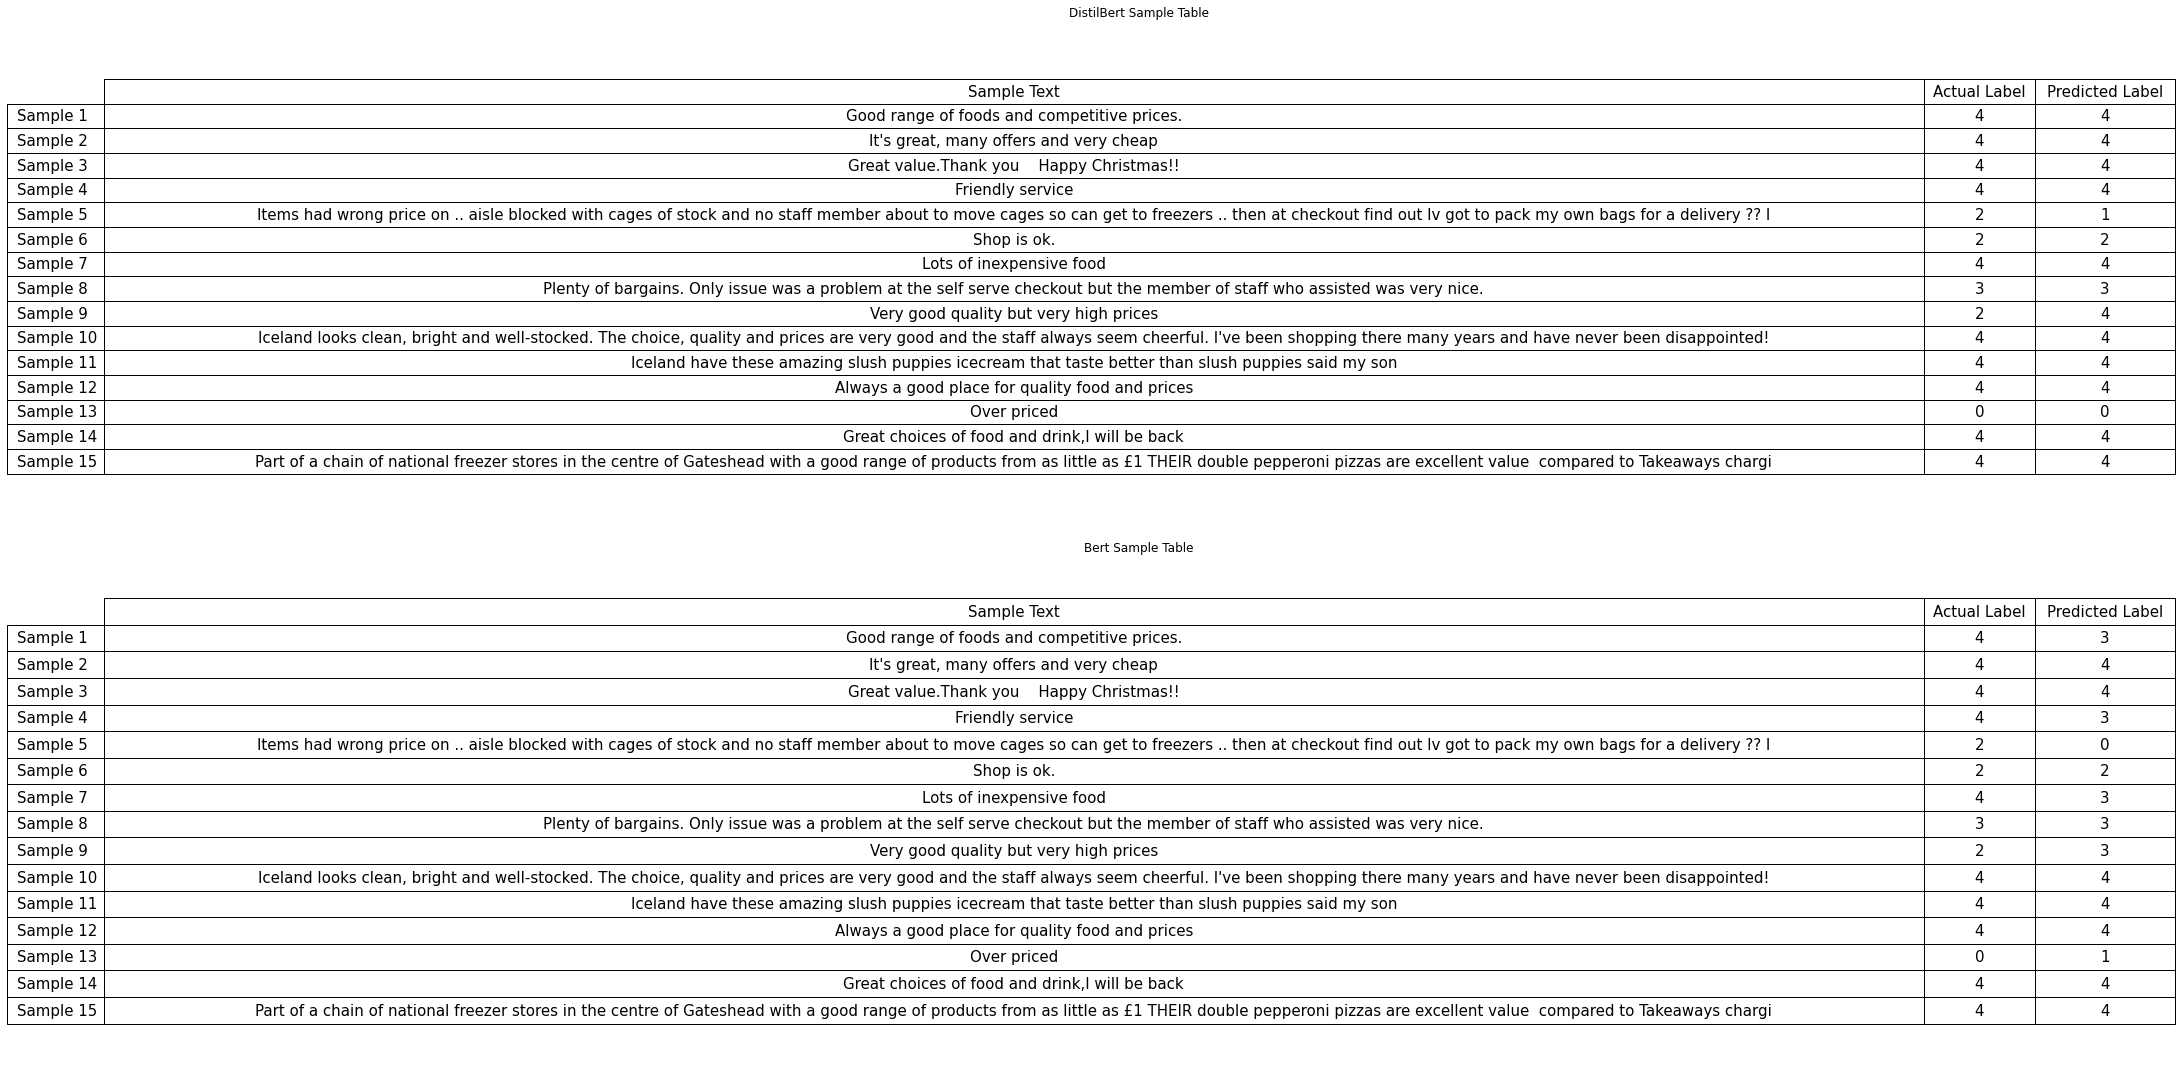

In [7]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
evaluator.plot_confusion_matrix(ax = axes[0])
axes[0].set_title("DistilBert Confusion Matrix")
evaluator_bert.plot_confusion_matrix(ax = axes[1])
axes[1].set_title("Bert Confusion Matrix")

plt.tight_layout()

fig2, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
num_samples = 15
sample_indices = random.sample(range(len(evaluator.all_actual_labels)), num_samples)

evaluator.display_sample_table(sample_indices, review_texts_test, ax=axes2[0])
axes2[0].set_title("DistilBert Sample Table")
evaluator_bert.display_sample_table(sample_indices, review_texts_test, ax=axes2[1])
axes2[1].set_title("Bert Sample Table")

plt.tight_layout()

plt.show()




Comparative Analysis of Fine-Tuned DistilBERT and Fine-Tuned DistilRoberta Models on Customer Review Data

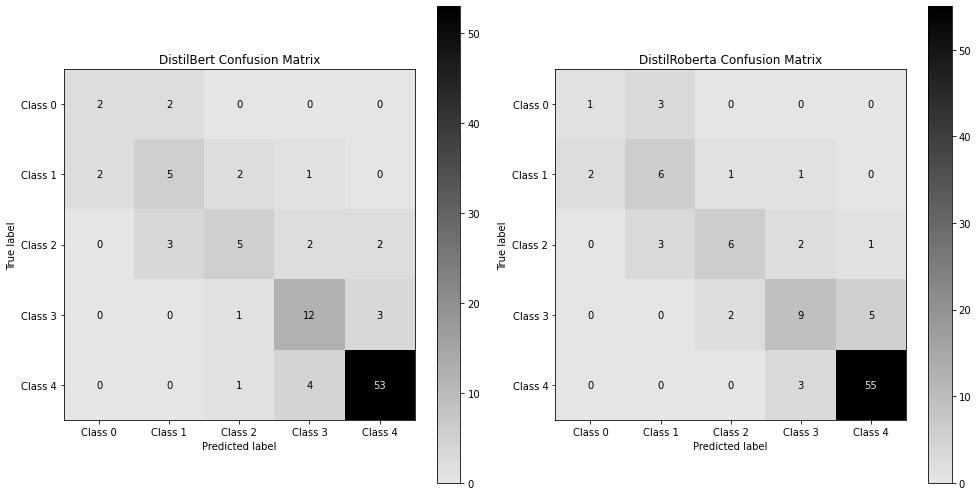

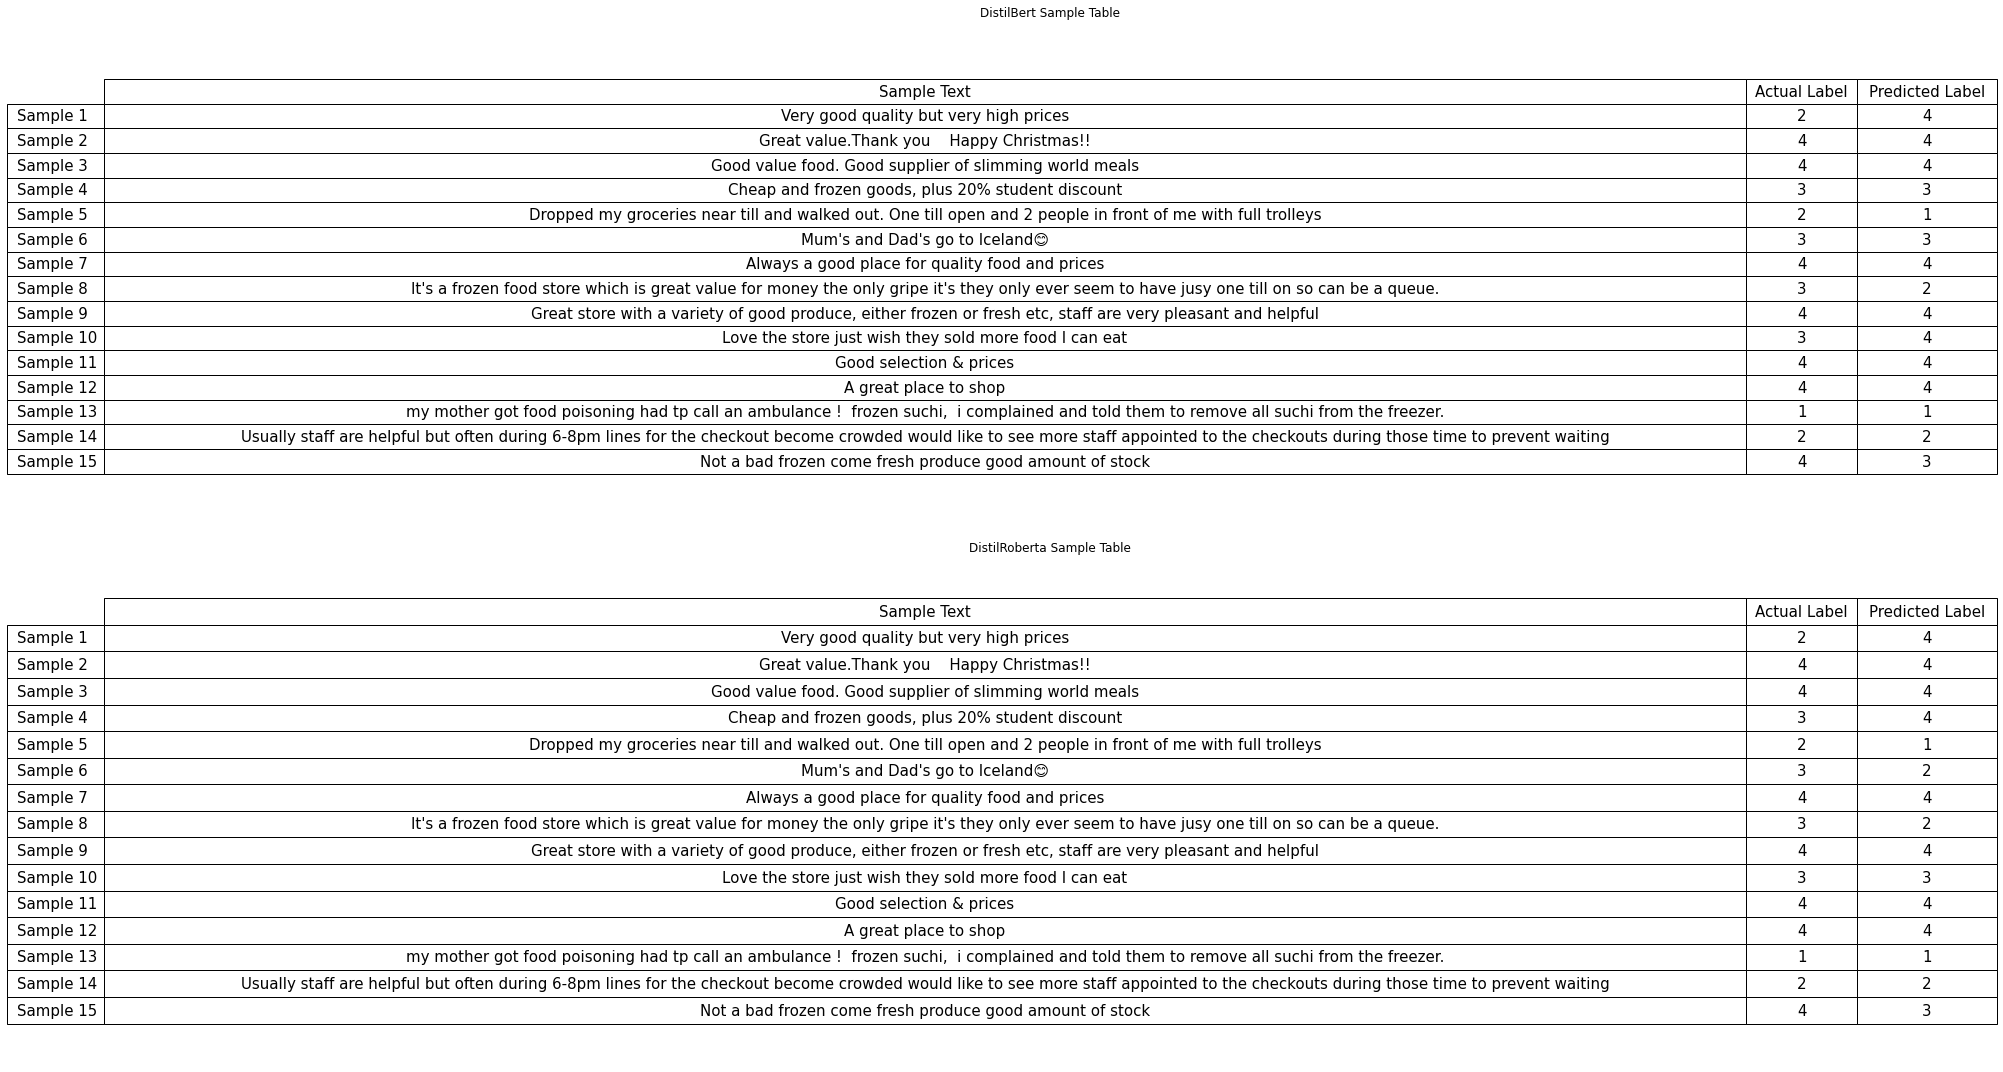

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
evaluator.plot_confusion_matrix(ax = axes[0])
axes[0].set_title("DistilBert Confusion Matrix")
evaluator_roberta.plot_confusion_matrix(ax = axes[1])
axes[1].set_title("DistilRoberta Confusion Matrix")

plt.tight_layout()

fig2, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
num_samples = 15
sample_indices = random.sample(range(len(evaluator.all_actual_labels)), num_samples)

evaluator.display_sample_table(sample_indices, review_texts_test, ax=axes2[0])
axes2[0].set_title("DistilBert Sample Table")
evaluator_roberta.display_sample_table(sample_indices, review_texts_test, ax=axes2[1])
axes2[1].set_title("DistilRoberta Sample Table")

plt.tight_layout()

plt.show()